In [1247]:
#import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
import graphviz
from sklearn import tree

MLP3
- Wesley Wong
- Kevin Khong

LOADING DATA:

In [1248]:
# #create dataframe from our data
df2 = pd.read_csv('/Users/wesleywong/Desktop/SchoolFolders/Spring 2022/CPSC4310notgit/CPSC4310/MLP/MLP2/input/sleepdata2Cleaned.csv',nrows=499)
df2.drop("Unnamed: 0", axis=1, inplace=True)

In [1249]:
#only used dataset 2

print(type(df2)) 

#selecting different elements for x
df2selected = df2[['Steps']]
#df2selected = df2[['Time before sleep (seconds)']]

#target 
df2target = df2[["Time asleep (seconds)"]]


<class 'pandas.core.frame.DataFrame'>


In [1250]:
X = df2selected
y = df2target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(X)
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


In [1251]:
tree_clf = DecisionTreeRegressor(max_depth=3)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
treermse = []
treer2 = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    treermse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    treer2.append(metrics.r2_score(y_test, y_pred))

#print(rmse)
#print(r2)
print(treermse, '\n Average RMSE:', np.mean(treermse))
print(treer2, '\n Average R2:', np.mean(treer2))

[3604.2178067427085, 3048.998748368487, 2828.165382288019, 3416.4244356355402, 2823.007053697729, 3053.887629091799, 4601.048257743915, 3307.1922957801626, 3191.337262262868, 3483.472805117341] 
 Average RMSE: 3335.775167672857
[-0.2649801623272203, -0.18471088917112577, -0.14423350016514647, -0.009185716767734275, -0.2245197425115848, 0.5075391152486424, 0.02959717314521393, -0.02886249345304659, 0.3185640617101432, 0.012109436082424319] 
 Average R2: 0.001131728179056557


In [1252]:
y_pred = tree_clf.predict(X_test)
y_pred

array([25068.11842818, 25068.11842818, 25068.11842818, 25469.27222222,
       25068.11842818, 25469.27222222, 25068.11842818, 25469.27222222,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       25068.11842818, 23113.06      , 25068.11842818, 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 25068.11842818,
       23246.27      , 25068.11842818, 23113.06      , 25068.11842818,
       25068.11842818, 25068.11842818, 25068.11842818, 23246.27      ,
       25068.11842818, 25469.27222222, 25469.27222222, 25068.11842818,
       25068.11842818])

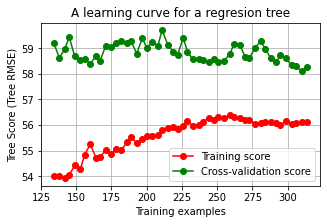

In [1253]:
# evaluate the training and testing and retrieve the information of model performance. 
train_sizes = np.linspace(0.3, 0.7, 50)

train_sizes, train_mse, test_mse = learning_curve(tree_clf, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
tree_test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a regresion tree')
ax.set_xlabel("Training examples")
ax.set_ylabel("Tree Score (Tree RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, tree_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

[Text(0.5, 0.875, 'X[0] <= 8043.5\nsquared_error = 12440118.484\nsamples = 450\nvalue = 24886.151'),
 Text(0.25, 0.625, 'X[0] <= 7899.5\nsquared_error = 9361168.319\nsamples = 382\nvalue = 25052.966'),
 Text(0.125, 0.375, 'X[0] <= 162.5\nsquared_error = 9259519.508\nsamples = 379\nvalue = 25020.049'),
 Text(0.0625, 0.125, 'squared_error = 4585056.87\nsamples = 10\nvalue = 23246.27'),
 Text(0.1875, 0.125, 'squared_error = 9298622.678\nsamples = 369\nvalue = 25068.118'),
 Text(0.375, 0.375, 'X[0] <= 7938.0\nsquared_error = 4771675.207\nsamples = 3\nvalue = 29211.6'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 32276.1'),
 Text(0.4375, 0.125, 'squared_error = 114142.623\nsamples = 2\nvalue = 27679.35'),
 Text(0.75, 0.625, 'X[0] <= 9755.5\nsquared_error = 28702077.199\nsamples = 68\nvalue = 23949.043'),
 Text(0.625, 0.375, 'X[0] <= 9670.5\nsquared_error = 47722080.036\nsamples = 28\nvalue = 21484.907'),
 Text(0.5625, 0.125, 'squared_error = 23200649.315\nsamples = 25\nv

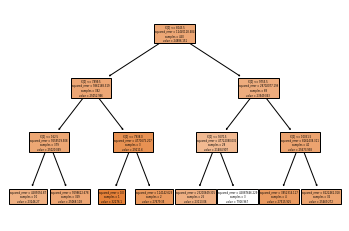

In [1254]:
dot_data = tree.export_graphviz(tree_clf, out_file='tree.dot') 
tree.plot_tree(tree_clf, filled= True)

RIDGE REGRESSION

In [1255]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=.01).fit(X_train, y_train)

print('Sleep')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Sleep
R-squared score (training): -0.002
R-squared score (test): -0.005
RMSE: 3887.920
ridge regression linear model intercept: [25149.59080156]
ridge regression linear model coeff:
[[-0.03320973]]
Number of non-zero features: 1


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


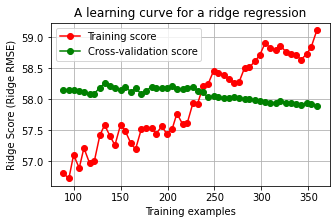

In [1256]:
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linridge, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

train_scores_mean = np.mean(train_scores, axis=1)
ridge_test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Ridge Score (Ridge RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, ridge_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

LINEAR REGRESSION

KFold(n_splits=10, random_state=None, shuffle=True)
0.0011678744898686588
0.0006581244894979799
[4977.029632801444, 4290.259768886767, 3603.430350864521, 3271.064806237461, 3421.7910029186082, 3485.858050704431, 3039.2432866702898, 2537.6253374800367, 2956.4006921167997, 3222.805549758437] 
 Average RMSE: 3480.5508478438796
[-0.044880595381282085, -0.04070999573825462, -0.008195315807968395, -0.011844176576858656, -0.01313708713987305, -0.009549220828219296, -0.12079814533373834, -0.013801472362097833, 0.005803130753997077, -0.023128632829229723] 
 Average R2: -0.02802415112435249


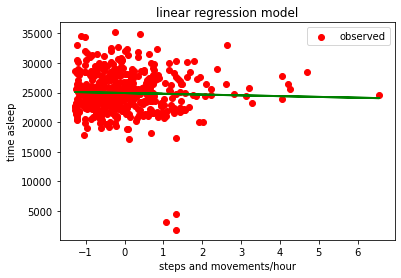

In [1257]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 10 folds 

kf.get_n_splits(X)

print(kf) 

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

linearrmse = []
linearr2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    linearrmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    linearr2.append(metrics.r2_score(y_test, y_pred))

print(linearrmse, '\n Average RMSE:', np.mean(linearrmse))
print(linearr2, '\n Average R2:', np.mean(linearr2))

    
#plot the linear model
plt.scatter(X_scaled, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('steps and movements/hour')
plt.ylabel('time asleep')
plt.title('linear regression model')
plt.plot(X_scaled, model.predict(X_scaled), c='green', label='fitted', linewidth=2)

plt.show()

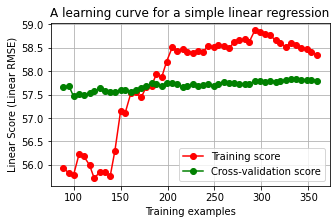

In [1258]:
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(model, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

train_scores_mean = np.mean(train_scores, axis=1)
linear_test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Linear Score (Linear RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, linear_test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

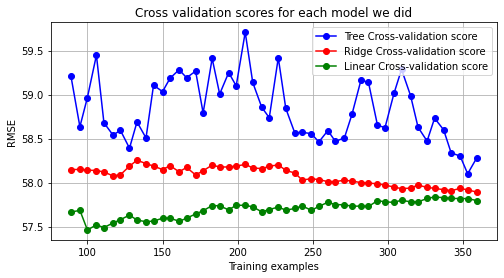

In [1259]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
ax.set_title('Cross validation scores for each model we did')
ax.set_xlabel("Training examples")
ax.set_ylabel("RMSE")
ax.grid()

ax.plot(train_sizes, tree_test_scores_mean, 'o-', color="b", label="Tree Cross-validation score")
ax.plot(train_sizes, ridge_test_scores_mean, 'o-', color="r", label="Ridge Cross-validation score")
ax.plot(train_sizes, linear_test_scores_mean, 'o-', color="g", label="Linear Cross-validation score")

ax.legend(loc="best")

plt.show()